# QFT

Directly provided as routine

In [1]:
from qat.lang.AQASM import *
from qat.lang.AQASM.qftarith import QFT

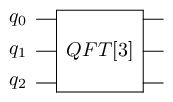

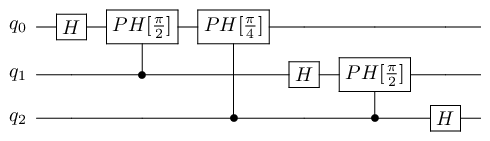

In [27]:
nqbits = 3
prog = Program()
qreg = prog.qalloc(nqbits)

prog.apply(QFT(nqbits), qreg)
qft_c = prog.to_circ()

%qatdisplay qft_c
%qatdisplay --depth=1 qft_c

In [29]:
from qat.qpus import PyLinalg
qpu = PyLinalg()

job = qft_c.to_job()
results = qpu.submit(job)

for sample in results:
    print(f"State {sample.state} with amplitude {sample.amplitude} and probability {sample.probability}")

State |000> with amplitude (0.3535533905932737+0j) and probability 0.12499999999999994
State |001> with amplitude (0.3535533905932737+0j) and probability 0.12499999999999994
State |010> with amplitude (0.3535533905932737+0j) and probability 0.12499999999999994
State |011> with amplitude (0.3535533905932737+0j) and probability 0.12499999999999994
State |100> with amplitude (0.3535533905932737+0j) and probability 0.12499999999999994
State |101> with amplitude (0.3535533905932737+0j) and probability 0.12499999999999994
State |110> with amplitude (0.3535533905932737+0j) and probability 0.12499999999999994
State |111> with amplitude (0.3535533905932737+0j) and probability 0.12499999999999994


# Arithmetic operations using QFT

Builds a circuit performing an addition using two qbits registers. The addition is done ‘in place’. Only the content of the first register is changed:
All additions, unless specified, are modulo
where n is the size of the register holding the result.

In [111]:
import random

In [116]:
reglen = 2
bitstra = bin(random.getrandbits(reglen))[2:].zfill(reglen)
bitstrb = bin(random.getrandbits(reglen))[2:].zfill(reglen)

print(bitstra)
print(bitstrb)

01
10


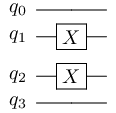

In [117]:
pr = Program()

qra = pr.qalloc(reglen)
qrb = pr.qalloc(reglen)

for bit, qbit in zip(bitstra, qra):
    if bit == "1":
        pr.apply(X, qbit)
for bit, qbit in zip(bitstrb, qrb):
    if bit == "1":
        pr.apply(X, qbit)
        
circ = pr.to_circ()
%qatdisplay circ

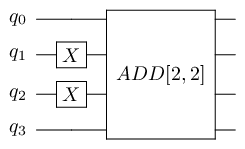

In [118]:
pr.apply(qftarith.add(len(qra), len(qrb)), qra, qrb)
circ = pr.to_circ()
%qatdisplay circ

In [119]:
job = circ.to_job(qubits=[qra])
results = qpu.submit(job)

for sample in results:
    print(f"State {sample.state} with probability {sample.probability}")

State |11> with probability 0.9999999999999993
